# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [5]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

### Step 2: Read in your data set 

In [32]:
#Read in data from source 
df_raw = pd.read_csv("projects/unit-projects/project-2/assets/admissions.csv")

In [33]:
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [34]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400 observations in our datasets. 

#### Question 2. Create a summary table

In [35]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE and GPA have different scales. GRE has a max of 800 whereas GPA has a max of 4.0. STD measures deviation away from mean. With the scale, GRE will have a higher absolute number of deviation. 

#### Question 4. Drop data points with missing data


In [27]:
df_raw.dropna()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [10]:
df = df_raw.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 399
Data columns (total 4 columns):
admit       397 non-null int64
gre         397 non-null float64
gpa         397 non-null float64
prestige    397 non-null float64
dtypes: float64(3), int64(1)
memory usage: 15.5 KB


#### Question 6. Create box plots for GRE and GPA

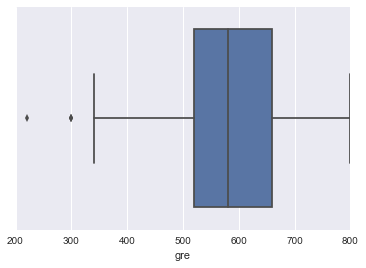

In [12]:
#boxplot 1 
a = sns.boxplot(x=df['gre'])

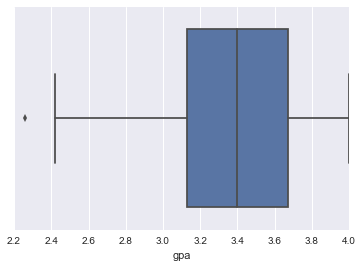

In [13]:
#boxplot 2 
b = sns.boxplot(x=df['gpa'])

#### Question 7. What do this plots show?

Answer: box plot shows the min, first quartile, median, third quartile and max.

#### Question 8. Describe each distribution 

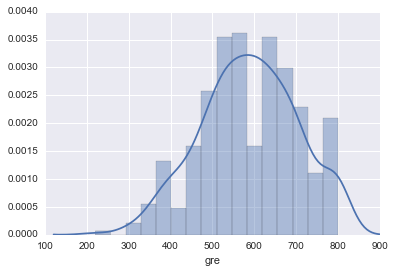

In [14]:
# plot the distribution of each variable 
c = sns.distplot(df['gre'])

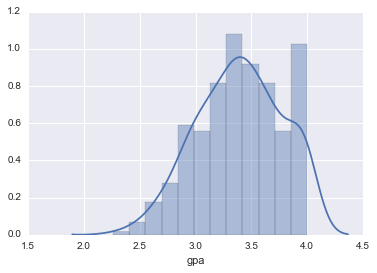

In [15]:
d = sns.distplot(df['gpa'])

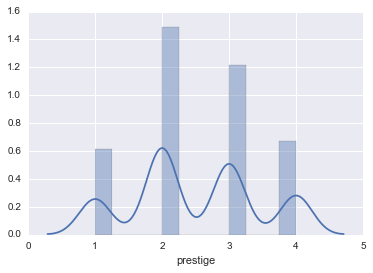

In [16]:
e = sns.distplot(df['prestige'])

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [18]:
print df.skew()
print df.kurt()

admit       0.787669
gre        -0.146047
gpa        -0.216889
prestige    0.086506
dtype: float64
admit      -1.386588
gre        -0.332864
gpa        -0.563570
prestige   -0.901038
dtype: float64


Answer: no. admit, gre, and gpa has skewness either above zero or below zero, indicating positive skewness and negative skewness, prestige has a skewness closest to zero. normal distribution has a skewness of zero. the closer to zero, the closer skewness resembles normal distribution. 

Normal distribution has a kurtosis of 3. Kurtosis of all variables in this example all have negative values, away from 3. They all have lower peaks, fatter tails, and tend to be further away than normal distribution. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: 
- both gre and gpa looks negatively skewed, we should correct it. 
- If we don't, the long tail can have impact on the model we are building. Reducing skewness could improve model. 
- to reduce skewness, we can either take square root or take natural logarithm of the data points. 

#### Question 11. Which of our variables are potentially colinear? 

In [19]:
# create a correlation matrix for the data
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


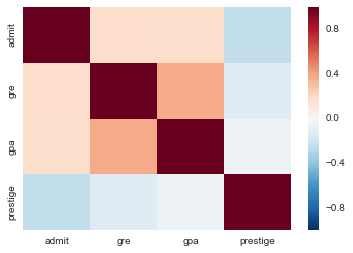

In [20]:
ax = sns.heatmap(df.corr())

#### Question 12. What did you find?

Answer: from the heatmap, it looks like gre and gpa has a somewhat positive correlation whereas gre and prestige have a somewhat negative correlation. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 
1. State the Hypothesis: 
 - H0: there's a significant relationship bewteen pretige of undergraduate schools to grad school admission rates
 - Ha: there's no significant relationship between prestige of undergraduate schools and grad school admission rates. 

2. Formulate analysis plan: 
 - Set significant level: we will use 0.05. 
 - Test method: we will calculate test statistics (t-score, z-score) and then decide if we should reject the null hypothesis given the significant level we chose).

#### Question 14. What is your hypothesis? 

Answer: 
This is a multivariate model hypothese testing. 

 - H0: There is no significant relationship between gre score, gpa, prestige and admission. 
 - Ha: There is a significant relationship between gre score, gpa, prestige and admission. 


## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

Answer: instead of dropping missing data, we can also replace missing data with mean, median or mode, or we can replace them with values based on regression models. 

#### 2. Bonus: Log transform the skewed data

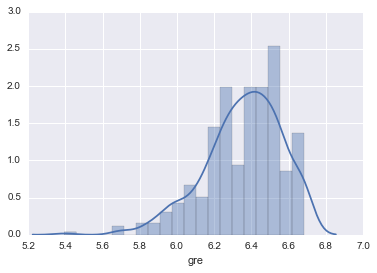

In [22]:
gre_log_transformed = df['gre'].apply(np.log)

f = sns.distplot(gre_log_transformed)

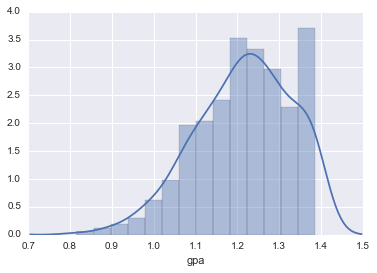

In [23]:
gpa_log_transformed = df['gpa'].apply(np.log)

g = sns.distplot(gpa_log_transformed)

#### 3. Advanced: Impute missing data

In [53]:
# check to make sure there're missing data.
df_raw[df_raw.isnull().any(axis=1)]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


In [61]:
# fill missing data with the mean value.
h = df_raw.fillna(df_raw.mean())

In [55]:
# verify there's no missing anymore.
h[h.isnull().any(axis=1)]

,admit,gre,gpa,prestige


In [63]:
# verify the missing values have been replaced with mean.
h.iloc[[187, 212, 236],:]

,admit,gre,gpa,prestige
187,0,588.040201,3.39093,2.000000
212,0,588.040201,2.87000,2.000000
236,1,660.000000,3.39093,2.486216
